# **New York City Taxi and Limousine Commission project**

## Build a multiple linear regression model


**The goal** is to build a multiple linear regression model and evaluate the model

### Imports and loading

In [ ]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for date conversions for calculating trip durations
import datetime as dt

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import sklearn.metrics as metrics

In [ ]:
# Load dataset into dataframe
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

### Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Performing EDA can help to:

* understand given variables;
* review the distributions of variables;
* identify incorrect or missing values;
* plot the relationship between different variables.

In [ ]:
# Start with `.shape` and `.info()`
print(df0.shape)
print( )
print(df0.info())

(22699, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  fl

In [ ]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [ ]:
df0.drop_duplicates()
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [ ]:
# Use .describe()
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Convert pickup & dropoff columns to datetime


In [ ]:
# Check the format of the data
print(df0['tpep_pickup_datetime'].dtype)
print(df0['tpep_dropoff_datetime'].dtype)

object
object


In [ ]:
# Convert datetime columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
print(df0['tpep_pickup_datetime'].dtype)

df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])
print(df0['tpep_dropoff_datetime'].dtype)

datetime64[ns]
datetime64[ns]


### Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [ ]:
# Create `duration` column
df0['duration'] = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43


### Outliers

In [ ]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

### Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

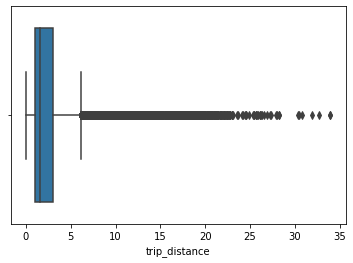

In [ ]:
sns.boxplot(df0['trip_distance'])
plt.show()

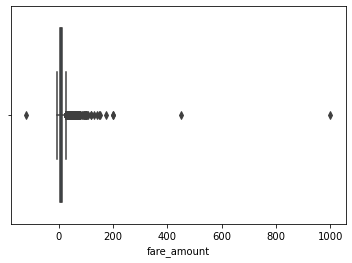

In [ ]:
sns.boxplot(df0['fare_amount'])
plt.show()

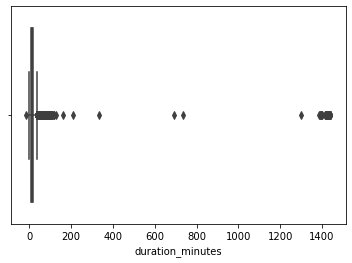

In [ ]:
df0['duration_minutes'] = round(df0['duration'].dt.total_seconds() / 60, 2)

sns.boxplot(df0['duration_minutes'])
plt.show()

**Questions:**
1. Which variable(s) contains outliers?

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All three variables contain outliers.
2. The trip_distance column contains unbelievable distances, which are too long.
3. Fare amount of 0 and negative values don't make sense.

### Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [ ]:
# Are trip distances of 0 bad data or very short trips rounded down?
df0['trip_distance'].sort_values().drop_duplicates()

22026     0.00
5501      0.01
16827     0.02
21088     0.03
13517     0.04
         ...  
29       30.83
10291    31.95
6064     32.72
13861    33.92
9280     33.96
Name: trip_distance, Length: 1545, dtype: float64

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger called a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [ ]:
df0[df0['trip_distance'] == 0.00]['Unnamed: 0'].count()

148

148 out of ~23,000 rides is relatively insignificant.

#### `fare_amount` outliers

In [ ]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

There are negative values in this column.

Values of zero could be possible if a trip that was immediately canceled.

The maximum fare amount in this dataset is nearly 1,000, which seems very unlikely.

In [ ]:
# Impute values less than $0 with 0
df0['fare_amount'][df0['fare_amount'] < 0] = 0
df0['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [ ]:
def upper_limit(data_frame, column_list, iqr_factor):

    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    df = data_frame.copy()

    for column in column_list:
        upper_limit = np.percentile(df[column], 75) + (iqr_factor * (np.percentile(df[column], 75) - np.percentile(df[column], 25)))
        for i in range(len(df[column])):
            if df[column].iloc[i] > upper_limit:
                df[column].iloc[i] = upper_limit
            else:
                df[column].iloc[i]
    return df


In [ ]:
df = upper_limit(df0, ['trip_distance', 'fare_amount', 'duration_minutes'], 6)

In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_minutes
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.823424,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,0 days 00:17:00.826600290,14.459722
std,3.274493e+07,0.496838,1.285231,3.252029,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,0 days 01:01:59.788923306,11.948007
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-1 days +23:43:01,-16.980000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,0 days 00:06:39,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,0 days 00:11:11,11.180000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,0 days 00:18:23,18.380000
max,1.134863e+08,2.000000,6.000000,15.480000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,0 days 23:59:33,88.760000


#### `duration` outliers


In [ ]:
# Call .describe() for duration outliers
df['duration_minutes'].describe()

count    22699.000000
mean        14.459722
std         11.948007
min        -16.980000
25%          6.650000
50%         11.180000
75%         18.380000
max         88.760000
Name: duration_minutes, dtype: float64

Low values should be no values that represent negative time. Impute all negative durations with `0`.

In [ ]:
# Impute a 0 for any negative values
df['duration_minutes'][df['duration_minutes'] < 0] = 0
df['duration_minutes'].describe()

count    22699.000000
mean        14.460471
std         11.946570
min          0.000000
25%          6.650000
50%         11.180000
75%         18.380000
max         88.760000
Name: duration_minutes, dtype: float64

### Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you do know to generalize about ones you do not know.

In this step, create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points.

In [ ]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].copy()
for i in range(len(df['PULocationID'])):
    df['pickup_dropoff'].iloc[i] = str(df['PULocationID'].iloc[i]) + ' ' + str(df['DOLocationID'].iloc[i])
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_minutes,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04,14.07,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30,26.50,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12,7.20,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15,30.25,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43,16.72,4 112


In [ ]:
grouped = df.groupby(['pickup_dropoff'])['trip_distance'].mean()
grouped

pickup_dropoff
1 1         2.433333
10 148     15.480000
100 1      15.480000
100 100     0.253333
100 107     1.180000
             ...    
97 65       0.500000
97 66       1.400000
97 80       3.840000
97 90       4.420000
97 97       1.006667
Name: trip_distance, Length: 4172, dtype: float64

In [ ]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

In [ ]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff'].copy()

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_minutes,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04,14.07,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30,26.50,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12,7.20,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15,30.25,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43,16.72,4 112,4.435000
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.5,0.5,2.06,0.0,0.3,12.36,0 days 00:08:00,8.00,161 236,2.052258
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,1.0,0.5,9.86,0.0,0.3,59.16,0 days 00:59:38,59.63,79 241,12.830000
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,1.0,0.5,1.78,0.0,0.3,19.58,0 days 00:21:59,21.98,237 114,4.022500
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.0,0.5,0.00,0.0,0.3,9.80,0 days 00:12:07,12.12,234 249,1.019259
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.0,0.5,2.75,0.0,0.3,16.55,0 days 00:20:26,20.43,239 237,1.580000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [ ]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_duration = df.groupby(['pickup_dropoff'])['duration_minutes'].mean()
grouped_duration_dict = grouped_duration.to_dict()
df['mean_duration_minutes'] = df['pickup_dropoff'].copy()
df['mean_duration_minutes'] = df['mean_duration_minutes'].map(grouped_duration_dict)

# Confirm that it worked
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04,14.07,100 231,3.521667,22.848333
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30,26.50,186 43,3.108889,24.470000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12,7.20,262 236,0.881429,7.250286
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15,30.25,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43,16.72,4 112,4.435000,14.620000
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.5,2.06,0.0,0.3,12.36,0 days 00:08:00,8.00,161 236,2.052258,11.855484
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.5,9.86,0.0,0.3,59.16,0 days 00:59:38,59.63,79 241,12.830000,59.630000
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.5,1.78,0.0,0.3,19.58,0 days 00:21:59,21.98,237 114,4.022500,26.437500
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.5,0.00,0.0,0.3,9.80,0 days 00:12:07,12.12,234 249,1.019259,7.872963
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.5,2.75,0.0,0.3,16.55,0 days 00:20:26,20.43,239 237,1.580000,10.541333


#### Create `day` and `month` columns

In [ ]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.strftime('%A')

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%B')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,0 days 00:14:04,14.07,100 231,3.521667,22.848333,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,0 days 00:26:30,26.50,186 43,3.108889,24.470000,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,0 days 00:07:12,7.20,262 236,0.881429,7.250286,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,0 days 00:30:15,30.25,188 97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,0 days 00:16:43,16.72,4 112,4.435000,14.620000,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [ ]:
def rush_hourizer(column):
    new_column = column.copy()
    for i in range(len(column)):
        if (column.iloc[i].strftime('%A') not in ['Saturday', 'Sunday']) & (column.iloc[i].strftime('%H') in ['06','07','08','09','16','17','18','19']):
            new_column.iloc[i] = 1
        else:
            new_column.iloc[i] = 0
    return new_column

In [ ]:
# Apply the `rush_hourizer()` function to the new column
df['rush_hour'] = rush_hourizer(df['tpep_pickup_datetime'])
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.3,16.56,0 days 00:14:04,14.07,100 231,3.521667,22.848333,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.3,20.80,0 days 00:26:30,26.50,186 43,3.108889,24.470000,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.3,8.75,0 days 00:07:12,7.20,262 236,0.881429,7.250286,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.3,27.69,0 days 00:30:15,30.25,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.3,17.80,0 days 00:16:43,16.72,4 112,4.435000,14.620000,Saturday,April,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.3,12.36,0 days 00:08:00,8.00,161 236,2.052258,11.855484,Saturday,March,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.3,59.16,0 days 00:59:38,59.63,79 241,12.830000,59.630000,Wednesday,May,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.3,19.58,0 days 00:21:59,21.98,237 114,4.022500,26.437500,Tuesday,August,1
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.3,9.80,0 days 00:12:07,12.12,234 249,1.019259,7.872963,Saturday,February,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.3,16.55,0 days 00:20:26,20.43,239 237,1.580000,10.541333,Friday,November,0


### Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

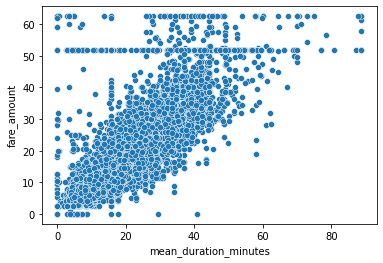

In [ ]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(x=df['mean_duration_minutes'], y=df['fare_amount'])
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of $62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [ ]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [ ]:
df[df['fare_amount'] == 52]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,15.48,2,N,236,132,...,0.3,72.92,0 days 00:36:48,36.80,236 132,15.480000,40.496667,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,15.48,2,N,132,163,...,0.3,52.80,0 days 01:06:51,66.85,132 163,15.480000,52.943000,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.3,52.80,0 days 00:00:58,0.97,132 132,1.941034,3.022414,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,15.48,2,N,132,79,...,0.3,52.80,0 days 00:29:11,29.18,132 79,15.480000,47.273333,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,15.48,2,N,132,234,...,0.3,73.20,0 days 00:29:29,29.48,132 234,15.480000,49.834000,Sunday,September,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22593,1690610,1,2017-01-20 18:05:09,2017-01-20 19:12:50,1,15.40,2,N,211,132,...,0.3,57.30,0 days 01:07:41,67.68,211 132,15.440000,61.690000,Friday,January,1
22604,20742961,1,2017-03-12 17:56:04,2017-03-12 18:40:47,2,15.48,2,N,230,132,...,0.3,58.34,0 days 00:44:43,44.72,230 132,15.480000,56.850000,Sunday,March,0
22620,52171010,2,2017-06-19 20:24:09,2017-06-19 21:01:04,3,15.48,2,N,132,261,...,0.3,58.30,0 days 00:36:55,36.92,132 261,15.480000,51.495000,Monday,June,0
22686,9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,...,0.3,74.18,0 days 01:20:45,80.75,170 70,10.640000,80.750000,Wednesday,February,1


Examine the first 30 of these trips.

In [ ]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,15.48,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,0 days 00:36:48,36.80,236 132,15.480000,40.496667,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,15.48,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0 days 01:06:51,66.85,132 163,15.480000,52.943000,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0 days 00:00:58,0.97,132 132,1.941034,3.022414,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,15.48,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0 days 00:29:11,29.18,132 79,15.480000,47.273333,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,15.48,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,0 days 00:29:29,29.48,132 234,15.480000,49.834000,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,15.48,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,0 days 00:39:50,39.83,132 48,15.480000,58.244762,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,0 days 00:15:37,15.62,228 88,4.730000,15.620000,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,15.48,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,0 days 00:45:27,45.45,132 48,15.480000,58.244762,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,15.48,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,0 days 00:42:51,42.85,186 132,15.480000,42.922000,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,15.48,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,0 days 01:11:35,71.58,132 148,15.480000,46.340000,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

For all of these trips RatecodeID is 2 (JFK). Pickup or dropoff location contain ID 132 for many of such trips.

A quick Google search for "new york city taxi flat rate 52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport and Manhattan.

### Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [ ]:
dfm = df.drop(columns=['passenger_count','store_and_fwd_flag','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount'])

In [ ]:
dfm.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,duration,duration_minutes,pickup_dropoff,mean_distance,mean_duration_minutes,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,3.34,1,100,231,1,13.0,0 days 00:14:04,14.07,100 231,3.521667,22.848333,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1.80,1,186,43,1,16.0,0 days 00:26:30,26.50,186 43,3.108889,24.470000,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1.00,1,262,236,1,6.5,0 days 00:07:12,7.20,262 236,0.881429,7.250286,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,3.70,1,188,97,1,20.5,0 days 00:30:15,30.25,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,4.37,1,4,112,2,16.5,0 days 00:16:43,16.72,4 112,4.435000,14.620000,Saturday,April,0


### Pair plot


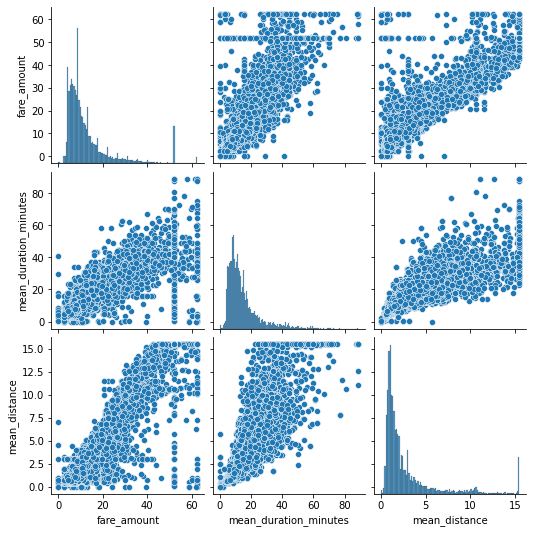

In [ ]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(dfm[['fare_amount','mean_duration_minutes','mean_distance']])

These variables all show linear correlation with each other.

### Identify correlations

In [ ]:
# Correlation matrix to help determine most correlated variables
corr_matrix = dfm.corr()

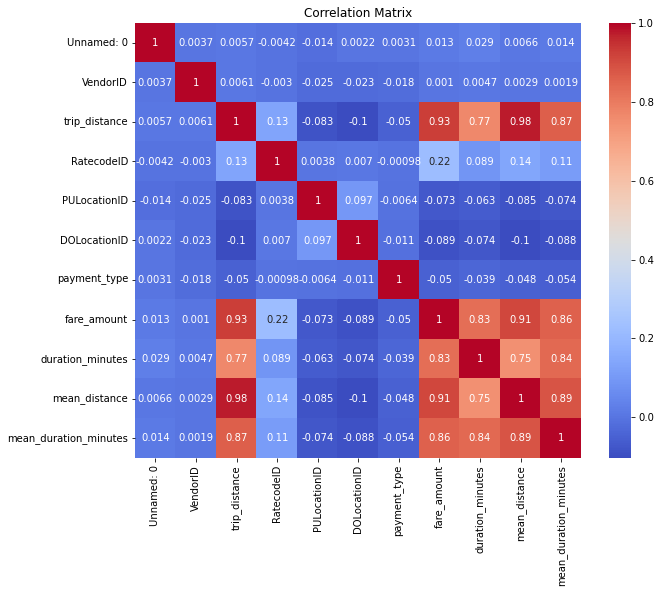

In [ ]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`?

mean_duration and mean_distance are both highly correlated with the target variable of fare_amount They're also both correlated with each other.

Highly correlated predictor variables can be bad for linear regression models when we want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

### Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [ ]:
X = dfm[['mean_distance', 'mean_duration_minutes']]

# Set y variable
y = dfm['fare_amount']

# Display first few rows
X.head()

,mean_distance,mean_duration_minutes
0,3.521667,22.848333
1,3.108889,24.470000
2,0.881429,7.250286
3,3.700000,30.250000
4,4.435000,14.620000


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [ ]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [ ]:
# Standardize the X variables
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

### Fit the model

Instantiate your model and fit it to the training data.

In [ ]:
# Fit your model to the training data
ols_formula = 'fare_amount ~ mean_distance + mean_duration_minutes'

from statsmodels.formula.api import ols

ols_data = pd.concat([X_train, y_train], axis = 1)
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()


### Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [ ]:
# Evaluate the model performance on the training data
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 4.754e+04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:59:36   Log-Likelihood:                -51964.
No. Observations:               18159   AIC:                         1.039e+05
Df Residuals:                   18156   BIC:                         1.040e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.81

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have a trained model and X_test, y_test
y_pred = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
rmse = np.sqrt(mse)


print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 17.908857145536768
MAE: 2.2036238277335323
RMSE: 4.231885767070842


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [ ]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Evaluate the model performance on the testing data

# Assuming you have a trained model and X_test, y_test
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse)


print("MSE test:", mse_test)
print("MAE test:", mae_test)
print("RMSE test:", rmse_test)

MSE test: 13.914341956961227
MAE test: 2.1251092255189437
RMSE test: 4.231885767070842


### Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [ ]:
# Create a `results` dataframe
actual = y_test
predicted = model.predict(X_test)
residuals = actual - predicted
results = pd.concat([actual, predicted, residuals], axis=1)
results.columns = ['actual', 'predicted', 'residuals']
results.head(10)

,actual,predicted,residuals
5818,14.0,12.733726,1.266274
18134,28.0,16.563332,11.436668
4655,5.5,6.622516,-1.122516
7378,15.5,17.108554,-1.608554
13914,9.5,10.495299,-0.995299
308,23.5,21.732110,1.767890
3061,39.5,38.496614,1.003386
12401,57.5,41.266787,16.233213
5662,24.5,23.869471,0.630529
21767,8.0,8.673999,-0.673999


### Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

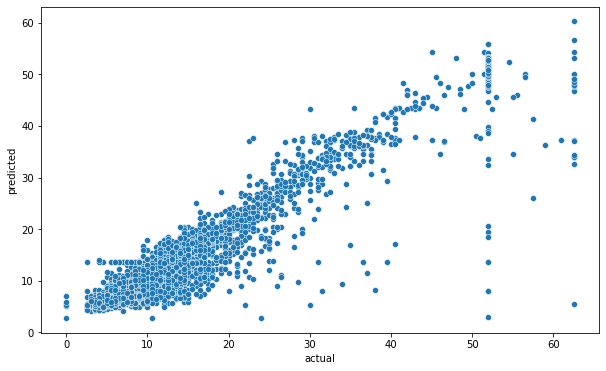

In [ ]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(10, 6))
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.show()

Visualize the distribution of the `residuals` using a histogram.

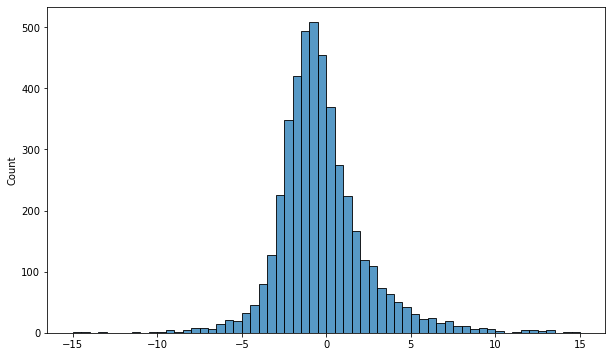

In [ ]:
# Visualize the distribution of the `residuals`
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=np.arange(-15,15.5,0.5))
plt.show()

In [ ]:
# Calculate residual mean
residuals.mean()

-0.03680730493975722

The distribution of the residuals is approximately normal and has a mean of -0.037. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Create a scatterplot of `residuals` over `predicted`.

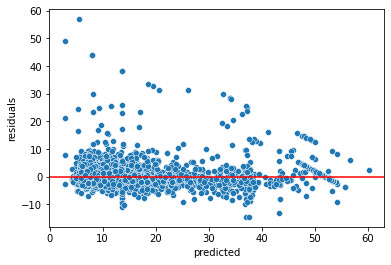

In [ ]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residuals'])
plt.axhline(0, c='red')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which are the imputed maximum of \$62.50 and the flat rate of \$52 for JFK airport trips.

### Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model.

In [ ]:
# Output the model's coefficients
coefficients = model.params
print(coefficients)

Intercept                2.810632
mean_distance            2.338896
mean_duration_minutes    0.241413
dtype: float64


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 4.754e+04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:08:46   Log-Likelihood:                -51964.
No. Observations:               18159   AIC:                         1.039e+05
Df Residuals:                   18156   BIC:                         1.040e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.8106      0.061     46.388      0.000       2.692       2.929
mean_distance             2.3389      0.021    110.161      0.000       2.297       2.381
mean_duration_minutes     0.2414      0.007     36.012      0.000       0.228       0.255
==============================================================================
Omnibus:                    21572.038   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3438924.549
Skew:                           6.253   Prob(JB):                         0.00
Kurtosis:                      69.247   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do these coefficients mean? How should they be interpreted?

According to the model, when trip distance and duration equal 0, the fare amount will be 2.8106 dollars.
An increase of one mile for the trip distance will result in an estimated 2.3389 dollars more in fare amount. When trip distance is used as the independent variable, it has a p-value of 0.000 and a 95% confidence interval of [2.297,2.381]. This means there is a 95% chance the interval [2.297,2.381] contains the actual parameter value of the slope.
An increase of one minute for the trip duration will result in an estimated 0.2414 dollars more in fare amount. When trip duration is used as the independent variable, it has a p-value of 0.000 and a 95% confidence interval of [0.228,0.255]. This means there is a 95% chance the interval [0.228,0.255] contains the actual parameter value of the slope.

### Conclusion

To predict taxi fares a multiple linear regression model was built. As independent variables were chosen trip distance and trip duration (correlation coefficients with fare amount 0.91 and 0.86 respectively).

Since the model will not know the duration of a trip until after the trip occurs, it was trained on a statistics that capture the mean distance and mean duration for each group of trips that share pickup and dropoff points.

Using mean distance and mean duration as the independent variables results in a multiple linear regression model with adjusted 𝑅2=0.840. In other words, the model explains 84% of the variation in fare amount. This makes the model an effective predictor of fare amount.

